In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
df_errands = pd.read_parquet('errands.parquet')
#df_errands.head()

In [4]:
df_orders = pd.read_parquet('orders.parquet')

In [3]:
df_errands.head()

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand
0,24770FC,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,0
1,2479LIP,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,0
2,247BO81,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,0
3,247BZ9A,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,0
4,247BZDY,52521010,2024-01-01 00:28:26,5: Document & travel info,1: Have no document,6: Other,19: Chat,1


In [5]:
df_orders.head()

,order_id,PNR,order_created_at,booking_system,Site_Country,Brand,Order_Amount,currency,Revenue,Partner,...,Device,client_entry_type,booking_system_source_type,Origin_Country,Destination_Country,Journey_Type_ID,Is_Changed,Is_Canceled,cancel_reason,change_reason
0,4607745402,VVNVMF,2024-01-01 00:00:01,System A,Italy,Brand A,824.68,Euro,9.09,Partner A,...,PC,b2bapi,GDS,Italy,Saudi Arabia,One-way,0,0,Undefined,Initial - Not Changed
1,4607744269,8WJRXE,2024-01-01 00:00:04,System A,Australia,Brand A,1760.80,Australian Dollar,14.74,Partner B,...,iPhone,metasearch,GDS,Australia,Philippines,Round-trip,1,0,Undefined,Schedule change: Primary Alternative
2,4607745343,EN91QW,2024-01-01 00:00:05,System B,Brazil,Brand B,977.50,Brazilian Real,58.94,Partner C,...,Android Phone,metasearch,API,Brazil,Brazil,Round-trip,0,0,Undefined,Initial - Not Changed
3,4607745473,PPY1VQ,2024-01-01 00:00:10,System B,USA,Brand A,61.78,US Dollar,10.09,Partner A,...,iPhone,b2bapi,API,USA,USA,Round-trip,0,0,Undefined,Initial - Not Changed
4,4607745421,75NN7W,2024-01-01 00:00:14,System C,Germany,Brand A,1756.50,Euro,9.09,Partner A,...,iPhone,b2bapi,NDC,Germany,USA,OpenJawSingleOrigin,0,0,Undefined,Initial - Not Changed


In [ ]:
#check the number of columns and unique value/categories in the column
for col in df_errands:
    print(f"Value counts for column '{col}':")
    print(df_errands[col].unique())
    print()

Value counts for column 'order_number':
['24770FC' '2479LIP' '247BO81' ... '24DZXE4' '24BQCV2' '2431P3A']

Value counts for column 'errand_id':
[52497975 52502839 52520705 ... 73308362 73308372 73308383]

Value counts for column 'created':
['2023-12-31 08:59:49' '2023-12-31 11:36:31' '2024-01-01 00:02:32' ...
 '2024-12-19 00:05:25' '2024-12-19 00:05:50' '2024-12-19 00:06:21']

Value counts for column 'errand_category':
['6: Payment questions' '9: Other services / products'
 '5: Document & travel info' '2: Cancellation / refund' '1: Rebooking'
 '43: No response' '7: Baggage' '4: Change of name & passenger info'
 '8: Seating' '18: Schedule change' '41: Call disconnected'
 '3: Claim wrong itinerary/dupe' '13: Language problem' '11: Site support'
 '14: FL Fraud errands process' '25: Other Booking.com products'
 '20: Ancillary team' '46: No information provided' '10: Force Majeure'
 '24: Accommodation ' '26: Booking.com phase 1 - No order in Edvin'
 '27: Trustpilot' '31: P&F Fraud' '54: Cla

In [ ]:
for col in df_orders:
    print(f"Value counts for column '{col}':")
    print(df_orders[col].unique())
    print()

Value counts for column 'order_id':
[4607745402 4607744269 4607745343 ... 4611677041 4611677611 4611677960]

Value counts for column 'PNR':
['VVNVMF' '8WJRXE' 'EN91QW' ... 'KFTOHX' 'IRSNUF' 'IQFDZX']

Value counts for column 'order_created_at':
<DatetimeArray>
['2024-01-01 00:00:01', '2024-01-01 00:00:04', '2024-01-01 00:00:05',
 '2024-01-01 00:00:10', '2024-01-01 00:00:14', '2024-01-01 00:00:18',
 '2024-01-01 00:00:19', '2024-01-01 00:00:23', '2024-01-01 00:00:34',
 '2024-01-01 00:00:41',
 ...
 '2024-03-31 23:59:41', '2024-03-31 23:59:43', '2024-03-31 23:59:44',
 '2024-03-31 23:59:48', '2024-03-31 23:59:52', '2024-03-31 23:59:53',
 '2024-03-31 23:59:54', '2024-03-31 23:59:56', '2024-03-31 23:59:57',
 '2024-04-01 00:00:00']
Length: 4056517, dtype: datetime64[ns]

Value counts for column 'booking_system':
['System A' 'System B' 'System C' 'System D,System B' 'System E'
 'System D' 'System E,System B' 'System A,System E' 'System B,System A'
 'System B,System E' 'System F' 'System A,Syste

In [ ]:
df_errands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885296 entries, 0 to 2885295
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   order_number     object
 1   errand_id        int64 
 2   created          object
 3   errand_category  object
 4   errand_type      object
 5   errand_action    object
 6   errand_channel   object
 7   is_test_errand   int64 
dtypes: int64(2), object(6)
memory usage: 176.1+ MB


In [6]:
df_errands.describe()

,errand_id,is_test_errand
count,2.885296e+06,2.885296e+06
mean,5.831884e+07,7.084334e-02
std,4.093410e+06,2.565630e-01
min,5.249798e+07,0.000000e+00
25%,5.537852e+07,0.000000e+00
50%,5.730642e+07,0.000000e+00
75%,6.017964e+07,0.000000e+00
max,7.330838e+07,1.000000e+00


In [7]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300206 entries, 0 to 6300205
Data columns (total 21 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   order_id                    int64         
 1   PNR                         object        
 2   order_created_at            datetime64[ns]
 3   booking_system              object        
 4   Site_Country                object        
 5   Brand                       object        
 6   Order_Amount                float64       
 7   currency                    object        
 8   Revenue                     float64       
 9   Partner                     object        
 10  Customer_Group_Type         object        
 11  Device                      object        
 12  client_entry_type           object        
 13  booking_system_source_type  object        
 14  Origin_Country              object        
 15  Destination_Country         object        
 16  Journey_Type_ID   

In [8]:
df_orders.describe()

,order_id,order_created_at,Order_Amount,Revenue,Is_Changed,Is_Canceled
count,6.300206e+06,6300206,6.300206e+06,6.300206e+06,6.300206e+06,6.300206e+06
mean,4.611157e+09,2024-02-14 18:54:33.344513280,6.025893e+04,2.506440e+03,5.644942e-02,3.912761e-02
min,4.600000e+09,2024-01-01 00:00:01,-3.326000e+01,-3.160941e+06,0.000000e+00,0.000000e+00
25%,4.607827e+09,2024-01-23 15:28:24.249999872,2.180200e+02,8.620000e+00,0.000000e+00,0.000000e+00
50%,4.611596e+09,2024-02-14 12:18:56,5.479900e+02,1.522000e+01,0.000000e+00,0.000000e+00
75%,4.616405e+09,2024-03-07 11:28:08.500000,1.688990e+03,4.606000e+01,0.000000e+00,0.000000e+00
max,4.620000e+09,2024-04-01 00:00:00,4.503267e+08,4.907213e+07,1.000000e+00,1.000000e+00
std,6.162882e+06,NaN,1.144734e+06,6.824414e+04,2.307876e-01,1.938985e-01


In [9]:
#check the null values in the dataset
df_errands.isnull().sum()

,0
order_number,0
errand_id,0
created,0
errand_category,0
errand_type,3
errand_action,2338
errand_channel,0
is_test_errand,0


In [10]:
df_errands[df_errands['errand_type'].isna()]

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand
48443,246XW7I,52954328,2024-01-09 01:13:50,23: Legal and Authority Claims Team,None,5. Force Majeure,1: Phone In,0
48444,247FM8Q,52954329,2024-01-09 01:13:52,23: Legal and Authority Claims Team,None,5. Force Majeure,1: Phone In,0
50695,247ERRU,52969341,2024-01-09 09:02:00,23: Legal and Authority Claims Team,None,1: Mail In,2: Mail In,0


In [11]:
df_errands['errand_type'].value_counts()

,count
errand_type,
1: No Flexible Ticket,493141
1: Ask about cxnl rules,484889
2: We have inf. about SC,256809
2: Already cxnl,155098
1. Customer not reached,140610
...,...
27: OTRS,1
9. Booking.com,1
15. APPR/MPPR,1


In [12]:
mode_value = df_errands['errand_type'].mode()[0]

In [13]:
mode_value

'1: No Flexible Ticket'

In [15]:
#Replace Null values of errand_type with mode of errand_type column
df_errands['errand_type'].fillna(mode_value, inplace=True)

In [16]:
df_errands[df_errands['errand_action'].isna()]

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand
271,247CD8V,52530703,2024-01-01 09:03:25,9: Other services / products,2: Meals,None,1: Phone In,0
1004,247CZX3,52551408,2024-01-01 16:53:29,9: Other services / products,2: Meals,None,19: Chat,1
1069,247CZX3,52552431,2024-01-01 17:24:09,9: Other services / products,2: Meals,None,19: Chat,0
1170,247BV2P,52553740,2024-01-01 18:07:41,9: Other services / products,2: Meals,None,2: Mail In,0
1863,247DTAT,52561788,2024-01-01 23:36:30,9: Other services / products,2: Meals,None,19: Chat,0
...,...,...,...,...,...,...,...,...
2522163,2437FLF,63423231,2024-07-08 17:44:24,9: Other services / products,2: Meals,None,19: Chat,0
2522743,247JHXP,63428663,2024-07-08 19:33:39,9: Other services / products,2: Meals,None,19: Chat,0
2524322,24DPFG1,63443700,2024-07-09 03:46:31,9: Other services / products,2: Meals,None,19: Chat,0
2525737,24EL1YF,63463972,2024-07-09 11:08:27,9: Other services / products,2: Meals,None,19: Chat,0


In [17]:
df_errands['errand_type'].value_counts()

,count
errand_type,
1: No Flexible Ticket,493144
1: Ask about cxnl rules,484889
2: We have inf. about SC,256809
2: Already cxnl,155098
1. Customer not reached,140610
...,...
27: OTRS,1
9. Booking.com,1
15. APPR/MPPR,1


In [18]:
df_errands['errand_action'].value_counts()

,count
errand_action,
3: No change made,385184
1: Info provided,201383
3: Not cxnl reservation,198617
1: Chat disconnected,140610
1: Cnxl reservation,133760
...,...
10: Incorrectly Placed Queue C70,1
9: Invol Reissue Queue C70,1
3: Rebooking - incorrect pricing,1


In [21]:
#Replace Null values of errand_action with 'No Response'
df_errands['errand_action'].fillna('No Response', inplace=True)

In [20]:
df_errands.isnull().sum()

,0
order_number,0
errand_id,0
created,0
errand_category,0
errand_type,0
errand_action,0
errand_channel,0
is_test_errand,0


In [22]:
#check duplicate values
df_errands.duplicated().sum()

0

In [23]:
##check duplicate values
df_orders.duplicated().sum()

0

In [24]:
#Count the Number of Contacts per Order
contacts_summary = df_errands.groupby("order_number").size().reset_index(name="contact_count")

In [25]:
#Calculate the Average Number of Contacts
average_contacts = contacts_summary["contact_count"].mean()

In [26]:
#Calculate the Distribution of Contacts
distribution = contacts_summary["contact_count"].value_counts(normalize=True).reset_index()
distribution.columns = ["number_of_contacts", "percentage"]
distribution["percentage"] *= 100  # Convert to percentage

In [27]:
#Display the Results
print("Average Contacts per Order:", average_contacts)
print("\nDistribution of Contacts per Order:")
print(distribution)

Average Contacts per Order: 2.8145412475771576

Distribution of Contacts per Order:
     number_of_contacts  percentage
0                     1   44.637264
1                     2   21.504596
2                     3   11.539313
3                     4    6.879067
4                     5    4.336485
..                  ...         ...
112                  81    0.000098
113                 154    0.000098
114                 243    0.000098
115                  90    0.000098
116                  86    0.000098

[117 rows x 2 columns]


In [ ]:
distribution.to_csv('distribution of contacts.csv')

In [31]:
import plotly.express as px

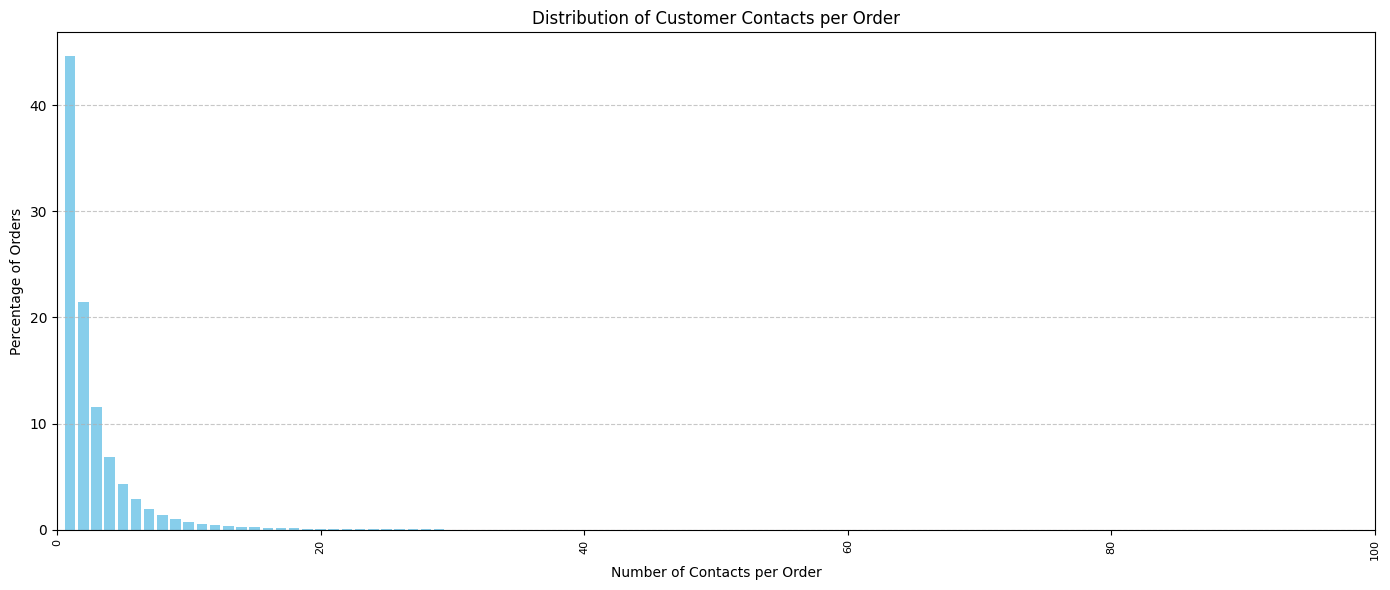

In [34]:
import matplotlib.pyplot as plt

# Assuming `distribution` DataFrame is already calculated
plt.figure(figsize=(14,6))  # Larger figure size for better readability
plt.bar(distribution["number_of_contacts"], distribution["percentage"], color='skyblue', width=0.8)

# Adjustments for readability
plt.xlabel("Number of Contacts per Order")
plt.ylabel("Percentage of Orders")
plt.title("Distribution of Customer Contacts per Order")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=8)

# Set x-axis limit to focus on a readable range (optional, adjust as needed)
plt.xlim(0, 100)  # Limit to 50 contacts per order; remove or adjust for larger range

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


##separate DataFrame for orders with multiple interactions.

In [38]:
# Identify orders with multiple interactions
repeated_orders = df_errands[df_errands.duplicated(subset=["order_number"], keep=False)]

In [39]:
# Create a new DataFrame for repeated orders
repeated_orders_summary = repeated_orders[["errand_category", "errand_type", "errand_action", "errand_channel"]]

In [48]:
repeated_orders_summary

,errand_category,errand_type,errand_action,errand_channel
0,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In
4,5: Document & travel info,1: Have no document,6: Other,19: Chat
5,2: Cancellation / refund,1: Ask about cxnl rules,3: Not cxnl reservation,1: Phone In
6,5: Document & travel info,1: Have no document,6: Other,19: Chat
10,1: Rebooking,1: No Flexible Ticket,3: No change made,1: Phone In
...,...,...,...,...
2885289,18: Schedule change,2: We have inf. about SC,16: Infd refund pending,39: SC Chat
2885290,4: Change of name & passenger info,1: Name correction,7: Referred to airline,19: Chat
2885291,18: Schedule change,2: We have inf. about SC,16: Infd refund pending,39: SC Chat
2885293,7: Baggage,1: Baggage information,1: Infd allowance,19: Chat


##plot bar chart of repeated orders

In [52]:
#plot bar chart of columns of repeated orders
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = repeated_orders_summary[cols].value_counts().nlargest(20)  # Get top 10 categories
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(
        width=1000,  # Increase chart width
        height=700,  # Increase chart height
        plot_bgcolor='#ffffff',
        paper_bgcolor='#ffffff'
    )
    fig.show()
for x in repeated_orders_summary:
    univariateAnalysis_category(x)

Distribution of errand_category
----------------------------------------------------------------


Distribution of errand_type
----------------------------------------------------------------


Distribution of errand_action
----------------------------------------------------------------


Distribution of errand_channel
----------------------------------------------------------------


##Errand orders dataset




In [35]:
df_orders = df_orders.drop(['order_id', 'PNR', 'order_created_at'], axis=1)  # Dropping multiple columns

In [36]:
#seperate categorical and numerical columns of order dataset
df_orders_cat = df_orders.select_dtypes(object)
df_orders_num = df_orders.select_dtypes(['float64','int64'])

In [45]:
df_orders_cat_plot = df_orders_cat[['Brand','Customer_Group_Type','Device','client_entry_type', 'booking_system_source_type','Journey_Type_ID']]

In [53]:
import plotly.express as px

In [54]:
#plot bar chart and pie chart of columns of order dataset
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = df_orders_cat_plot[cols].value_counts()
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(
        values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation(
        x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in df_orders_cat_plot:
    univariateAnalysis_category(x)

Distribution of Brand
----------------------------------------------------------------


       
Distribution of Customer_Group_Type
----------------------------------------------------------------


       
Distribution of Device
----------------------------------------------------------------


       
Distribution of client_entry_type
----------------------------------------------------------------


       
Distribution of booking_system_source_type
----------------------------------------------------------------


       
Distribution of Journey_Type_ID
----------------------------------------------------------------


In [55]:
df_orders_cat_plot_1 = df_orders_cat[['Site_Country','currency','Partner','Origin_Country', 'Destination_Country','cancel_reason','change_reason']]

In [56]:
#plot bar plot of some columns of order dataset
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = df_orders_cat_plot_1[cols].value_counts().head(15)
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
for x in df_orders_cat_plot_1:
    univariateAnalysis_category(x)

Distribution of Site_Country
----------------------------------------------------------------


Distribution of currency
----------------------------------------------------------------


Distribution of Partner
----------------------------------------------------------------


Distribution of Origin_Country
----------------------------------------------------------------


Distribution of Destination_Country
----------------------------------------------------------------


Distribution of cancel_reason
----------------------------------------------------------------


Distribution of change_reason
----------------------------------------------------------------


In [57]:
# convert the categorical data of orders dataset into numerical by using label encoding
from sklearn.preprocessing import LabelEncoder

In [58]:
for col in df_orders_cat:
  le=LabelEncoder()
  df_orders_cat[col]=le.fit_transform(df_orders_cat[col])
print(df_orders_cat.head())

   booking_system  Site_Country  Brand  currency  Partner  \
0               0            32      0        11        0   
1               0             1      0         1       27   
2              54             6      1         3       54   
3              54            66      0        41        0   
4             107            22      0        11        0   

   Customer_Group_Type  Device  client_entry_type  booking_system_source_type  \
0                    3       6                  2                           2   
1                    3       9                  7                           2   
2                    3       0                  7                           0   
3                    3       9                  2                           0   
4                    0       9                  2                           4   

   Origin_Country  Destination_Country  Journey_Type_ID  cancel_reason  \
0              99                  172                1             33  

In [59]:
#make all columns of orders dataset on same scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [60]:
df_orders_num_mm=df_orders_num.copy()

In [61]:
for col in df_orders_num_mm:
  mm=MinMaxScaler()
  df_orders_num_mm[col] = mm.fit_transform(df_orders_num_mm[[col]])

In [62]:
df_orders_cat_mm=df_orders_cat.copy()

In [63]:
for col in df_orders_cat_mm:
  mm=MinMaxScaler()
  df_orders_cat_mm[col] = mm.fit_transform(df_orders_cat_mm[[col]])

In [64]:
#combine numerical and categorical data of orders dataset
new_orders_df=pd.concat([df_orders_num_mm,df_orders_cat_mm],axis=1)

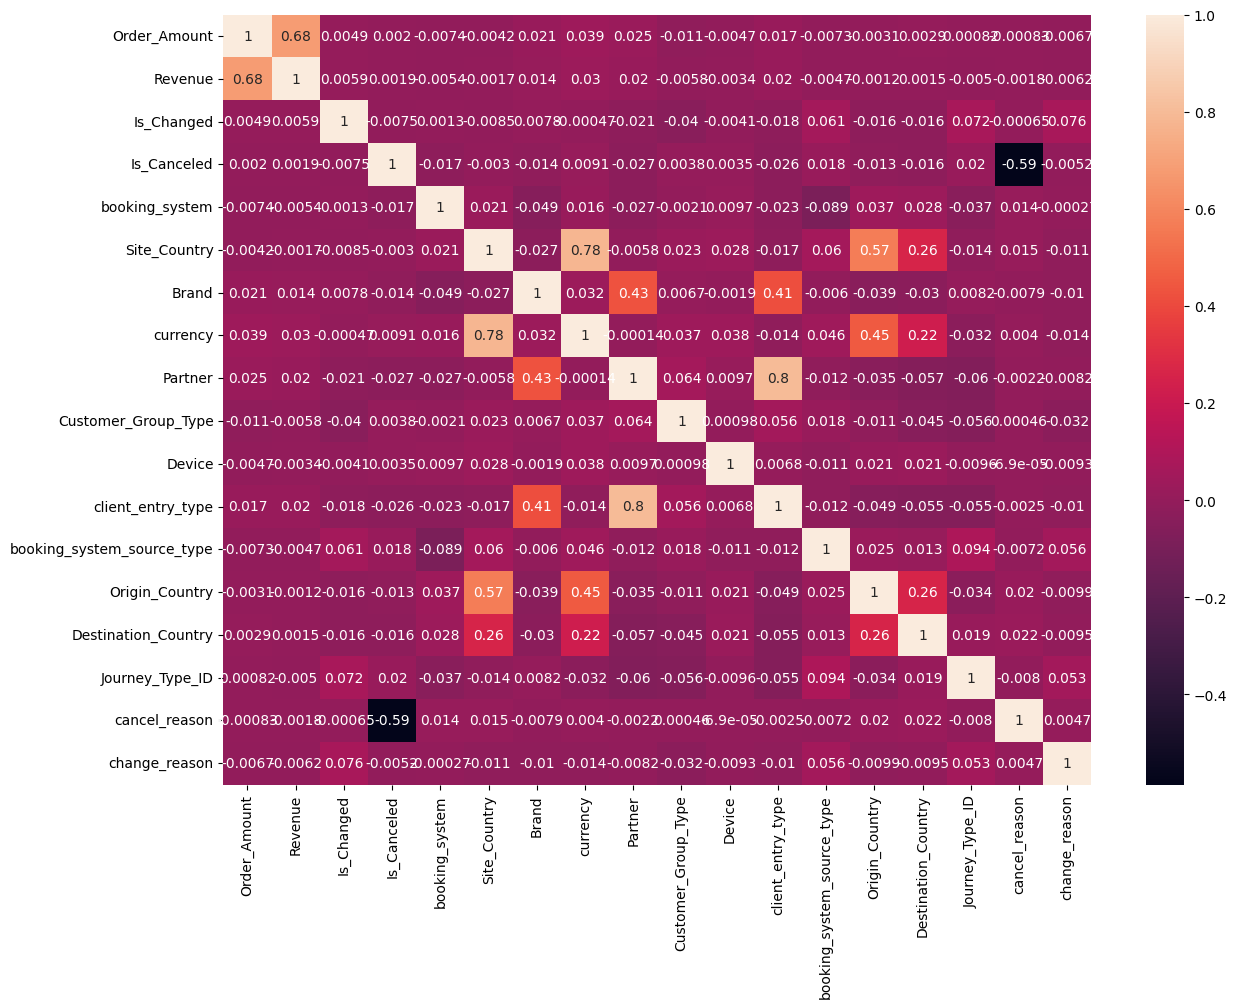

In [65]:
#find the correlation between the features of orders dataset by using heatmap
plt.figure(figsize=(14,10))
sns.heatmap(new_orders_df.corr(), annot=True)
plt.show()

#Errand Dastaset EDA

In [66]:
df_errands = df_errands.drop(['order_number', 'errand_id', 'created'], axis=1)  # Dropping multiple columns

In [67]:
#seperate numerical and categorical column of errand dataset
df_errands_cat = df_errands.select_dtypes(object)
df_errands_num = df_errands.select_dtypes(['float64','int64'])

In [68]:
#plot the bar chart and pie chart of categorical column of errands dataset
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = df_errands_cat[cols].value_counts().head(15)
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
for x in df_errands_cat:
    univariateAnalysis_category(x)

Distribution of errand_category
----------------------------------------------------------------


Distribution of errand_type
----------------------------------------------------------------


Distribution of errand_action
----------------------------------------------------------------


Distribution of errand_channel
----------------------------------------------------------------


In [69]:
#convert the categorical data of errands into numerical
for col in df_errands_cat:
  le=LabelEncoder()
  df_errands_cat[col]=le.fit_transform(df_errands_cat[col])
print(df_errands_cat.head())

   errand_category  errand_type  errand_action  errand_channel
0               41          112             85               1
1               41          142             85               1
2               41          208             85               0
3               44          140            351               0
4               40           64            327               0


In [70]:
df_errands_num_mm=df_errands_num.copy()

In [71]:
#make all columns of errands dataset on same scale
for col in df_errands_num_mm:
  mm=MinMaxScaler()
  df_errands_num_mm[col] = mm.fit_transform(df_errands_num_mm[[col]])

In [73]:
df_errands_cat_mm=df_errands_cat.copy()

In [74]:
for col in df_errands_cat_mm:
  mm=MinMaxScaler()
  df_errands_cat_mm[col] = mm.fit_transform(df_errands_cat_mm[[col]])

In [75]:
#combine the numerical and categorical data of errnad dataset
new_errands_df=pd.concat([df_errands_num_mm,df_errands_cat_mm],axis=1)

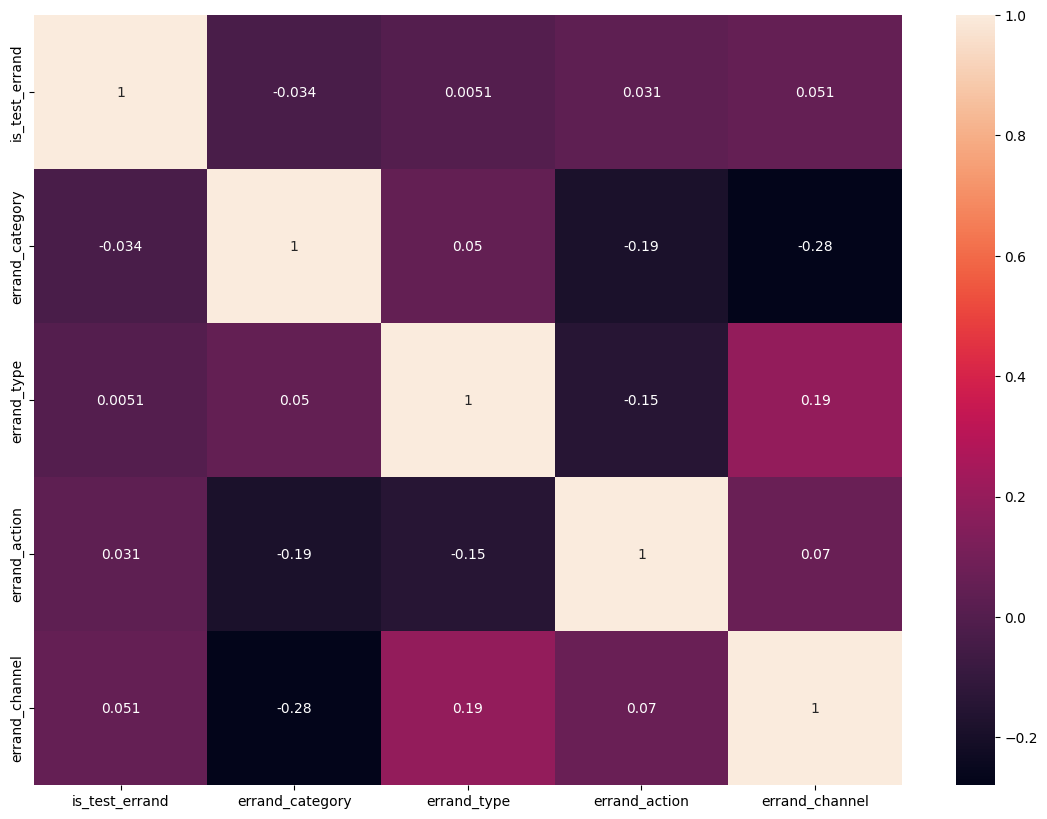

In [76]:
#find the correlation between the columns of errands dataset
plt.figure(figsize=(14,10))
sns.heatmap(new_errands_df.corr(), annot=True)
plt.show()